In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os.path
import pickle
from scipy.stats import norm
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#import pyDOE
from sepia.SepiaModel import SepiaModel
from sepia.SepiaData import SepiaData
import sepia.SepiaPlot as SepiaPlot
from examples.Optimization.SepiaOptim import SepiaOptim

In [3]:
import os
datadir = os.getcwd()+"/data/data_ball_drop_2/"
# experimental data
with open(datadir+'fieldDat15x6gparam.txt','r') as f:
    field_data = np.loadtxt(f)
with open(datadir+'desNative4x2Rrho.txt','r') as f:
    x = np.loadtxt(f) # x = {R, rho_ball}
x_obs = x

y_obs = [np.array(field_data[0:3,4]),np.array(field_data[3:6,4]),\
         np.array(field_data[6:12,4]),np.array(field_data[12:,4])]
h_obs = [np.array(field_data[0:3,3]),np.array(field_data[3:6,3]),\
         np.array(field_data[6:12,3]),np.array(field_data[12:,3])]# observed heights

# simulated data
with open(datadir+'desNative80x4Cg.txt','r') as f:
    sim_data = np.loadtxt(f)
x_sim = sim_data[:,0:2] # x = {R, rho_ball}
t_sim = sim_data[:,2:4] # t = {C, g}
with open(datadir+'simHeights101x1','r') as f:
    h_sim = np.loadtxt(f)
with open(datadir+'sims101x80Cg.txt','r') as f:
    y_sim = np.loadtxt(f).T

# create sepia data object
data = SepiaData(x_sim = x_sim, t_sim = t_sim, y_ind_sim = h_sim, y_sim = y_sim,\
                 x_obs = x, y_obs = y_obs, y_ind_obs = h_obs)

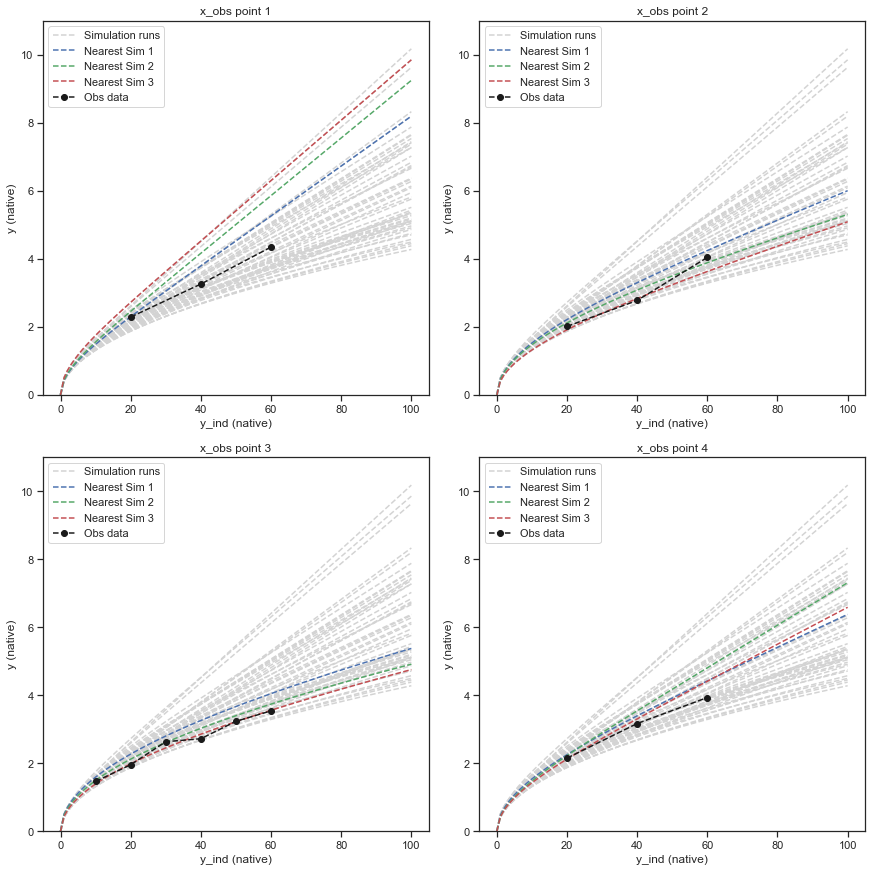

In [4]:
data_figure = data.plot_data(x_min = -5, x_max = 105, y_min = 0, y_max = 11)

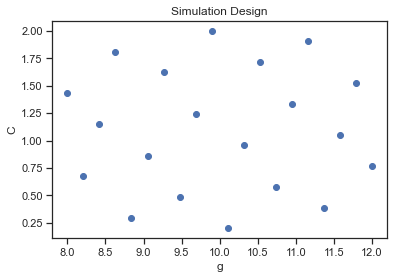

In [5]:
fig,ax = plt.subplots()
ax.scatter(t_sim[0:20,1],t_sim[0:20,0])
ax.set_xlabel("g");ax.set_ylabel("C"),ax.set_title("Simulation Design")
plt.show()

In [6]:
data.transform_xt()
data.standardize_y()

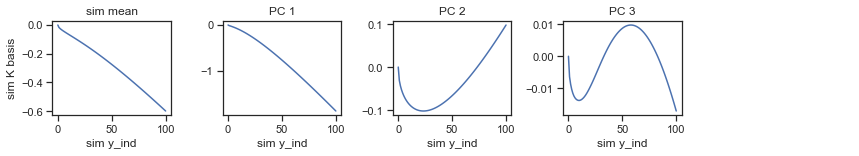

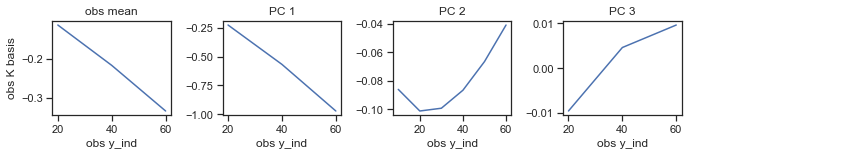

In [7]:
data.create_K_basis(3)
fig_sim, fig_obs = data.plot_K_basis()

In [8]:
data.create_D_basis('linear')
print(data)

This SepiaData instance implies the following:
This is a simulator and obs model, sim y dimension 101, obs y dimension ragged
n  =     4 (number of observed data)
m  =    80 (number of simulated data)
p  =     2 (number of inputs)
q  =     2 (number of additional simulation inputs to calibrate)
pu =     3 (transformed response dimension)
pv =     2 (transformed discrepancy dimension)



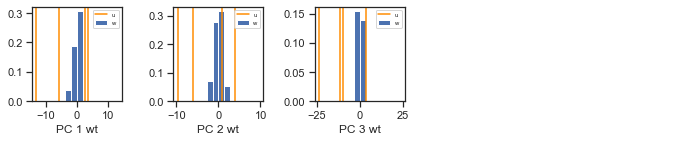

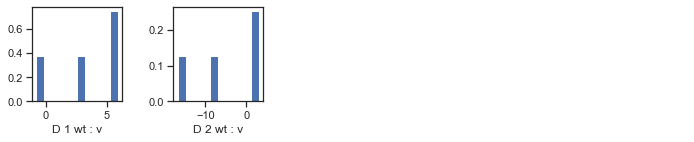

In [9]:
fig_uw, fig_v = data.plot_K_weights()

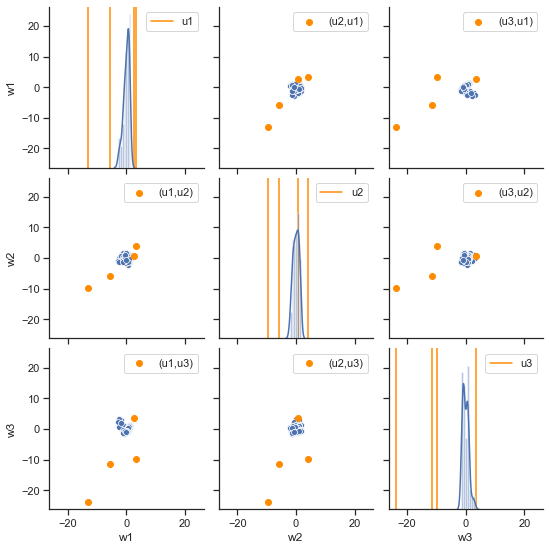

In [10]:
uw_figure = data.plot_u_w_pairs()

## MCMC with option for parameter optimization

In [11]:
model = SepiaModel(data)

override= 0
optim = 1
cachefile_name='pkls/ball_drop_2_raggedmodel'

if os.path.isfile(cachefile_name+'.pkl') and override==0:
    model.restore_model_info(cachefile_name)
else:
    if optim:
        optimizer = SepiaOptim(model)
        x_opt, f_opt, f_hist, it, fnc_calls, p_native = optimizer.particle_swarm(w_max=.9,w_min=.4,c1=.5,c2=.3,\
                             maxiter=1000,swarmsize=100,obj_tol=1e-8,step_tol=1e-8,
                            log_transform=['betaU','betaV','lamUz','lamVz','lamOs','lamWOs','lamWs'],verbose=True)
        optimizer.set_model_params(p_native)
        model.tune_step_sizes(50, 20, update_vals=False)
    else:
        model.tune_step_sizes(50,20,update_vals=True)
    model.do_mcmc(5000)
    model.save_model_info(cachefile_name)

  0%|          | 0/1000 [00:00<?, ?it/s]

lamWOs initialized outside default bounds [60, 1e5]; setting initial value to 1e5 - 1.
optimization bounds: ([0.0, 0.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1.2039728043259361, -1.2039728043259361, -1.2039728043259361, 4.0943445622221, 4.0943445622221, 4.0943445622221, 4.0943445622221, -1], [1.0, 1.0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229])


Step size tuning:   0%|          | 0/50 [00:00<?, ?it/s]

Stopping search: Swarm best position change less than 1e-08
max obj fnc: -45018.21189509416
  param  opt value native
  theta          0.096174
  theta          0.723766
  betaV          1.125601
  betaV          5.346906
  betaU          1.737098
  betaU          3.338589
  betaU          0.127824
  betaU          0.068328
  betaU          0.004223
  betaU          1.677722
  betaU          0.563813
  betaU          0.375372
  betaU          2.127515
  betaU          2.642660
  betaU          3.279362
  betaU          0.091050
  lamVz          3.353178
  lamUz          0.300000
  lamUz          0.300463
  lamUz          1.037272
  lamWs       5533.461772
  lamWs       3682.459634
  lamWs       1756.507931
 lamWOs      99997.502792
  lamOs         79.344806
Starting tune_step_sizes...
Default step sizes:
theta
[[0.2 0.2]]
betaV
[[0.1]
 [0.1]]
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamVz
[[10.]]
lamUz
[[5. 5. 5.]]
lamWs
[[100. 100. 100.]]
lamWOs
[[100.]]
lamO

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

Done with tune_step_size.
Selected step sizes:
theta
[[0.27382204 0.51342285]]
betaV
[[0.88058574]
 [0.30132133]]
betaU
[[0.21586484 0.03570703 0.53340445]
 [0.50242449 0.08799497 0.53051333]
 [0.10556469 0.21090033 0.45544324]
 [0.04194852 0.15971509 0.02866364]]
lamVz
[[5220.25789111]]
lamUz
[[0.28554958 0.26086394 0.74707007]]
lamWs
[[10664.7894122  11587.26983159  5896.15564614]]
lamWOs
[[135.59882192]]
lamOs
[[201.92490357]]


MCMC sampling: 100%|██████████| 5000/5000 [01:44<00:00, 47.70it/s]

Model saved to pkls/ball_drop_2_raggedmodel.pkl


In [12]:
samples_dict = model.get_samples()
theta_names = ['C','g']
p_stats = SepiaPlot.param_stats(samples_dict,theta_names=theta_names,q1=.05,q2=.95,digits=4)
print(np.round(p_stats,4))

                      mean         sd  0.05 quantile  0.95 quantile
C                   0.2062     0.0424         0.1386         0.2773
g                   0.4913     0.0774         0.3699         0.6238
betaV_1             1.0315     2.3773         0.0002         5.6049
betaV_2             0.6944     1.4413         0.0038         3.2355
betaU_1             0.2521     0.1425         0.0917         0.5331
betaU_2             0.8529     0.3393         0.4551         1.4913
betaU_3             0.2089     0.0634         0.1292         0.3273
betaU_4             0.0733     0.0214         0.0465         0.1130
betaU_5             0.0546     0.0311         0.0206         0.1132
betaU_6             0.1188     0.0815         0.0501         0.2263
betaU_7             0.8897     0.1721         0.6367         1.1838
betaU_8             0.3571     0.0891         0.2382         0.5188
betaU_9             0.6252     0.3507         0.2572         1.1949
betaU_10            0.9310     0.6801         0.

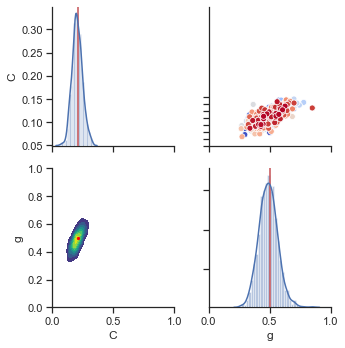

In [13]:
theta_post_fig = SepiaPlot.theta_pairs(samples_dict,theta_names,theta_ref=[[0.2075],[0.5003]],save='plots/theta_post.png')

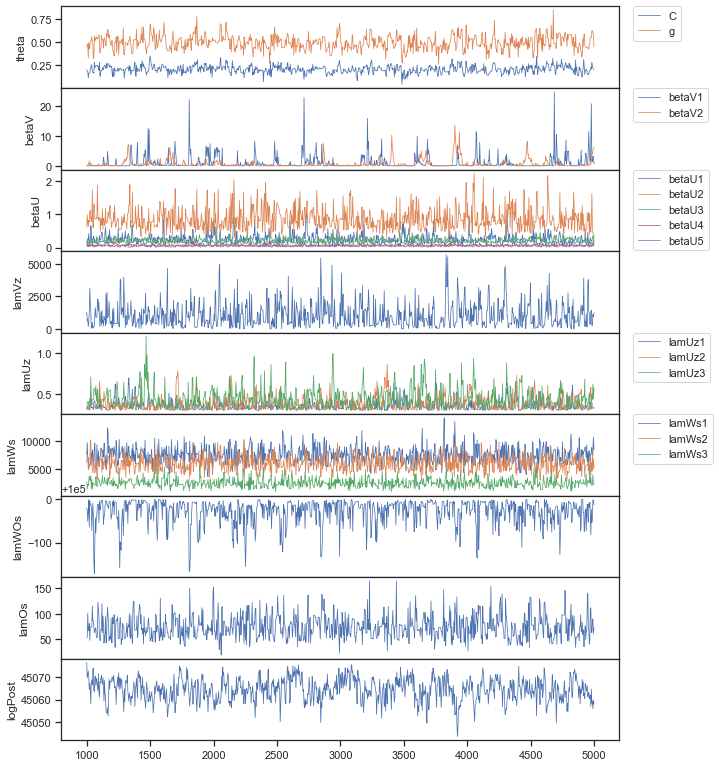

In [14]:
mcmc_trace_fig = SepiaPlot.mcmc_trace(samples_dict,theta_names,start=1000,n_to_plot=1000,max_print=5,\
                                     save='plots/mcmc_trace.png')

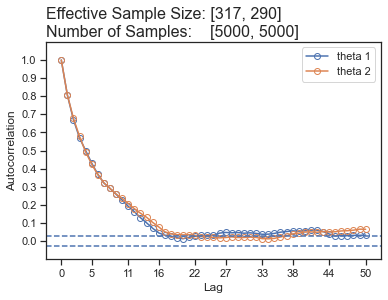

In [15]:
acf = SepiaPlot.plot_acf(model,nlags=50,nburn=0,save='plots/acf.png')

In [16]:
from sepia.SepiaPredict import SepiaFullPrediction
pred_samples=model.get_samples(nburn=1000,effectivesamples=True)
pred=SepiaFullPrediction(x_pred=data.obs_data.x, samples=pred_samples, model=model)

Max effective sample size over thetas: 236
Total samples: 4000


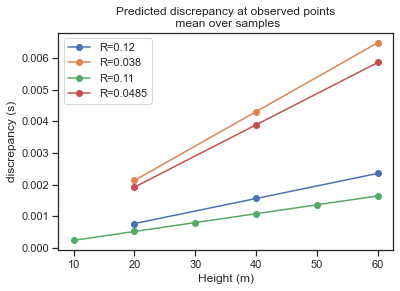

In [17]:
predd=[]
for i in range(4):
    predd.append(pred.get_discrepancy(as_obs=True,obs_ref=i))
fig, ax = plt.subplots()
for i in range(4):
    ax.plot(model.data.obs_data.y_ind[i],np.mean(predd[i],0).T,marker='o',label='R={}'.format(x_obs[i,0]))  
ax.set_xlabel('Height (m)')
ax.set_ylabel('discrepancy (s)')
ax.set_title('Predicted discrepancy at observed points\n mean over samples')
plt.legend()
plt.show()

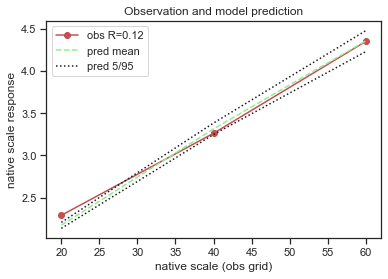

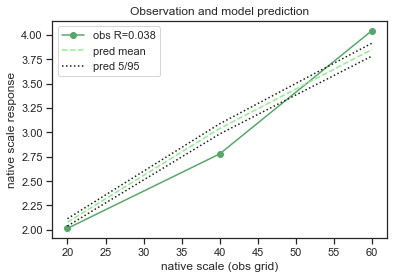

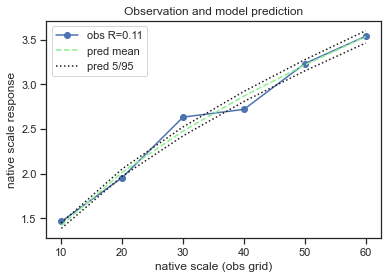

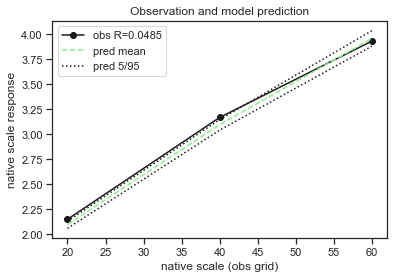

In [18]:
colors = ('r','g','b','k')
for R_idx in range(4):
    plt.figure()
    predyobs=pred.get_yobs(as_obs=True, obs_ref=R_idx)
    plt.plot(model.data.obs_data.y_ind[R_idx],model.data.obs_data.y[R_idx],marker='o',c=colors[R_idx])
    plt.plot(model.data.obs_data.y_ind[R_idx],np.mean(predyobs,0).T,'--',c='lightgreen')
    plt.plot(model.data.obs_data.y_ind[R_idx],np.quantile(predyobs,[0.05, 0.95],axis=0).T,'k:')
    plt.xlabel('native scale (obs grid)')
    plt.ylabel('native scale response')
    plt.title('Observation and model prediction')
    plt.legend(['obs R={}'.format(x_obs[R_idx,0]),'pred mean','pred 5/95'])
    plt.show()